In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CDMX_Final.csv')
data.head(2)

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,35797,https://www.airbnb.com/rooms/35797,20240925021012,2024-09-25,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,...,4.83,4.93,4.73,S/N,f,1,1,0,0,1.74
1,1,44616,https://www.airbnb.com/rooms/44616,20240925021012,2024-09-26,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,descripción general del vecindario,https://a0.muscache.com/pictures/251410/ec75fe...,...,4.78,4.98,4.48,S/N,f,8,4,1,0,0.41


In [3]:
#Calculamos valores nulos y mostramos todas la filas
valores_nulos= data.isnull().sum().sum()
valores_nulos

np.int64(0)

In [4]:
#creo dos dataframe para procesasar los outliers
cuantitativas = data.iloc[:, list(range(41,49)) + list(range(52,55)) + list(range(57,59)) + list(range(62,68)) + list(range(71,75)) + [1,3,10,23,24,31,32,35,36,38,39]]
cualitativas = data.iloc[:, list(range(4, 9)) +  list(range(11,22)) + list(range(25, 30)) +    [2,33,34,37,40,50,51,56,60,61,69,70]]

In [6]:
cuantitativas

,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,...,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds
0,3865.00,1,7,1,1,7,7,1.0,28,58,...,20240925021012,153786,1,1,19.383820,-99.273340,2,1.0,1.0,1.00
1,1511.65,1,365,1,1,365,365,1.0,1,24,...,20240925021012,196253,12,13,19.411620,-99.177940,14,1.0,5.0,1.97
2,2029.00,2,30,2,2,30,30,2.0,3,20,...,20240925021012,334451,3,4,19.411520,-99.168570,4,1.0,2.0,2.00
3,1140.00,5,180,3,5,180,180,3.7,7,27,...,20240925021012,212109,3,4,19.356140,-99.163080,2,1.0,1.0,1.00
4,3633.00,1,365,1,1,1125,1125,1.0,9,9,...,20240925021012,540705,5,7,19.432110,-99.193270,2,1.5,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,488.00,1,45,2,6,45,45,2.9,30,60,...,20240925021012,67472234,167,279,19.387329,-99.246731,4,1.0,2.0,2.00
26578,2800.00,1,365,1,1,365,365,1.0,0,0,...,20240925021012,596009321,16,16,19.432687,-99.197736,2,1.0,1.0,1.00
26579,2700.00,1,365,1,1,365,365,1.0,0,0,...,20240925021012,596009321,16,16,19.432687,-99.197736,2,1.0,1.0,1.00
26580,2600.00,1,365,1,1,365,365,1.0,0,0,...,20240925021012,596009321,16,16,19.432687,-99.197736,2,1.0,1.0,1.00


<Figure size 1500x800 with 0 Axes>

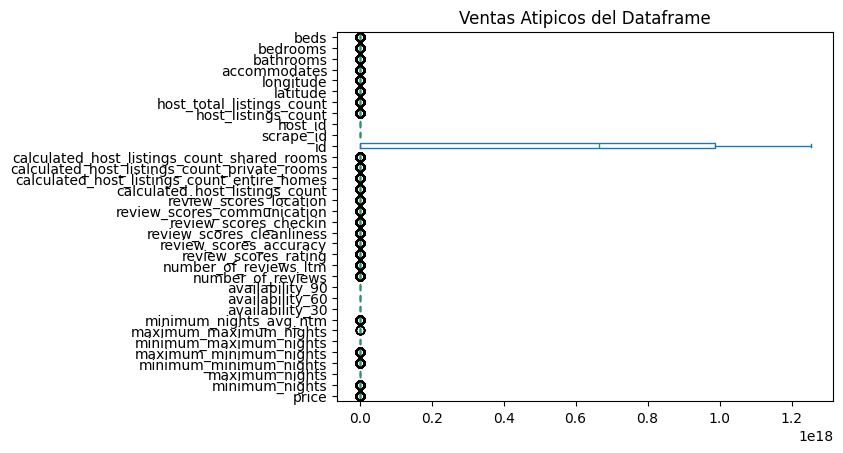

In [7]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
ig= plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Ventas Atipicos del Dataframe")
plt.show()

In [8]:
y=cuantitativas
Limite_Superior= y.mean() + 3 *y.std()
Limite_Inferior = y.mean() - 3 *y.std()
print("Limite Superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite Superior permitido price                                           1.583067e+04
minimum_nights                                  8.183006e+01
maximum_nights                                  1.793887e+03
minimum_minimum_nights                          7.822020e+01
maximum_minimum_nights                          8.040781e+01
minimum_maximum_nights                          2.058532e+03
maximum_maximum_nights                          2.133457e+03
minimum_nights_avg_ntm                          7.949662e+01
availability_30                                 4.852387e+01
availability_60                                 9.733159e+01
availability_90                                 1.496068e+02
number_of_reviews                               2.711536e+02
number_of_reviews_ltm                           7.505979e+01
review_scores_rating                            5.783774e+00
review_scores_accuracy                          5.786205e+00
review_scores_cleanliness                       5.769719e+0

In [9]:
#Obtenemos datos y los outlers se convierten 
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,...,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds
0,3865.00,1.0,7.0,1.0,1.0,7,7.0,1.0,28,58,...,20240925021012,153786,1.0,1.0,19.383820,NaN,2.0,1.0,1.0,1.00
1,1511.65,1.0,365.0,1.0,1.0,365,365.0,1.0,1,24,...,20240925021012,196253,12.0,13.0,19.411620,-99.177940,NaN,1.0,5.0,1.97
2,2029.00,2.0,30.0,2.0,2.0,30,30.0,2.0,3,20,...,20240925021012,334451,3.0,4.0,19.411520,-99.168570,4.0,1.0,2.0,2.00
3,1140.00,5.0,180.0,3.0,5.0,180,180.0,3.7,7,27,...,20240925021012,212109,3.0,4.0,19.356140,-99.163080,2.0,1.0,1.0,1.00
4,3633.00,1.0,365.0,1.0,1.0,1125,1125.0,1.0,9,9,...,20240925021012,540705,5.0,7.0,19.432110,-99.193270,2.0,1.5,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,488.00,1.0,45.0,2.0,6.0,45,45.0,2.9,30,60,...,20240925021012,67472234,167.0,279.0,19.387329,-99.246731,4.0,1.0,2.0,2.00
26578,2800.00,1.0,365.0,1.0,1.0,365,365.0,1.0,0,0,...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00
26579,2700.00,1.0,365.0,1.0,1.0,365,365.0,1.0,0,0,...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00
26580,2600.00,1.0,365.0,1.0,1.0,365,365.0,1.0,0,0,...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00


In [10]:
#corroboramos valores nulos del datagrame3
valores_nulos=data3.isnull().sum()
valores_nulos

price                                            94
minimum_nights                                  190
maximum_nights                                    1
minimum_minimum_nights                          174
maximum_minimum_nights                          192
minimum_maximum_nights                            0
maximum_maximum_nights                            7
minimum_nights_avg_ntm                          184
availability_30                                   0
availability_60                                   0
availability_90                                   0
number_of_reviews                               608
number_of_reviews_ltm                           432
review_scores_rating                            408
review_scores_accuracy                          404
review_scores_cleanliness                       436
review_scores_checkin                           310
review_scores_communication                     435
review_scores_location                          521
calculated_h

In [11]:
#Reemplazamos valores atipicos (nulos) del datagrame con mean
#Realizamos copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1 ))
data_clean

,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,...,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds
0,3865.00,1.0,7.0,1.0,1.0,7,7.0,1.0,28,58,...,20240925021012,153786,1.0,1.0,19.383820,-99.200000,2.0,1.0,1.0,1.00
1,1511.65,1.0,365.0,1.0,1.0,365,365.0,1.0,1,24,...,20240925021012,196253,12.0,13.0,19.411620,-99.177940,3.1,1.0,5.0,1.97
2,2029.00,2.0,30.0,2.0,2.0,30,30.0,2.0,3,20,...,20240925021012,334451,3.0,4.0,19.411520,-99.168570,4.0,1.0,2.0,2.00
3,1140.00,5.0,180.0,3.0,5.0,180,180.0,3.7,7,27,...,20240925021012,212109,3.0,4.0,19.356140,-99.163080,2.0,1.0,1.0,1.00
4,3633.00,1.0,365.0,1.0,1.0,1125,1125.0,1.0,9,9,...,20240925021012,540705,5.0,7.0,19.432110,-99.193270,2.0,1.5,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,488.00,1.0,45.0,2.0,6.0,45,45.0,2.9,30,60,...,20240925021012,67472234,167.0,279.0,19.387329,-99.246731,4.0,1.0,2.0,2.00
26578,2800.00,1.0,365.0,1.0,1.0,365,365.0,1.0,0,0,...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00
26579,2700.00,1.0,365.0,1.0,1.0,365,365.0,1.0,0,0,...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00
26580,2600.00,1.0,365.0,1.0,1.0,365,365.0,1.0,0,0,...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00


In [12]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0
availability_90                                 0
number_of_reviews                               0
number_of_reviews_ltm                           0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_location                          0
calculated_host_listings_count                  0


**PROCEDIMIENTO "CUANTILES" PARA SUSTIRTUIR OUTLIERS EN DATAFRAME**

In [13]:
y=cuantitativas

percentile25=y.quantile(0.25)
percentile75=y.quantile(0.75)
iqr=percentile75 - percentile25

Limite_Superior_izq=percentile75 + 1.5*iqr
Limite_Inferior_izq=percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_izq)
print("Limite inferior permitido", Limite_Inferior_izq)

Limite superior permitido price                                           2.795125e+03
minimum_nights                                  3.500000e+00
maximum_nights                                  2.542500e+03
minimum_minimum_nights                          3.500000e+00
maximum_minimum_nights                          6.000000e+00
minimum_maximum_nights                          2.265000e+03
maximum_maximum_nights                          2.265000e+03
minimum_nights_avg_ntm                          5.250000e+00
availability_30                                 6.350000e+01
availability_60                                 1.130000e+02
availability_90                                 1.625000e+02
number_of_reviews                               1.355000e+02
number_of_reviews_ltm                           5.250000e+01
review_scores_rating                            5.255000e+00
review_scores_accuracy                          5.230000e+00
review_scores_cleanliness                       5.265000e+0

In [14]:
#Obtenemos datos limppios
data3_izq=cuantitativas[(y<=Limite_Superior_izq)& (y>=Limite_Inferior_izq)]
data3_izq

,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,...,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds
0,NaN,1.0,7,1.0,1.0,7,7.0,1.0,28,58,...,20240925021012,153786,1.0,1.0,19.383820,NaN,2.0,1.0,1.0,1.00
1,1511.65,1.0,365,1.0,1.0,365,365.0,1.0,1,24,...,20240925021012,196253,12.0,13.0,19.411620,-99.177940,NaN,1.0,NaN,1.97
2,2029.00,2.0,30,2.0,2.0,30,30.0,2.0,3,20,...,20240925021012,334451,3.0,4.0,19.411520,-99.168570,4.0,1.0,2.0,2.00
3,1140.00,NaN,180,3.0,5.0,180,180.0,3.7,7,27,...,20240925021012,212109,3.0,4.0,19.356140,-99.163080,2.0,1.0,1.0,1.00
4,NaN,1.0,365,1.0,1.0,1125,1125.0,1.0,9,9,...,20240925021012,540705,5.0,7.0,19.432110,-99.193270,2.0,1.5,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,488.00,1.0,45,2.0,6.0,45,45.0,2.9,30,60,...,20240925021012,67472234,NaN,NaN,19.387329,NaN,4.0,1.0,2.0,2.00
26578,NaN,1.0,365,1.0,1.0,365,365.0,1.0,0,0,...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00
26579,2700.00,1.0,365,1.0,1.0,365,365.0,1.0,0,0,...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00
26580,2600.00,1.0,365,1.0,1.0,365,365.0,1.0,0,0,...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00


In [15]:
valores_nulos=data3_izq.isnull().sum()
valores_nulos

price                                           2083
minimum_nights                                  3584
maximum_nights                                     0
minimum_minimum_nights                          3124
maximum_minimum_nights                          2040
minimum_maximum_nights                             0
maximum_maximum_nights                             7
minimum_nights_avg_ntm                          2023
availability_30                                    0
availability_60                                    0
availability_90                                    0
number_of_reviews                               2328
number_of_reviews_ltm                           1318
review_scores_rating                            1868
review_scores_accuracy                          2198
review_scores_cleanliness                       1987
review_scores_checkin                           1808
review_scores_communication                     2085
review_scores_location                        

In [16]:
#Remplazamos valores atipicos 
data4_izq=data3_izq.copy()
data4_izq=data4_izq.fillna(round(data3_izq.mean(),1))
data4_izq

,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,availability_30,availability_60,...,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds
0,1093.10,1.0,7,1.0,1.0,7,7.0,1.0,28,58,...,20240925021012,153786,1.0,1.0,19.383820,-99.200000,2.0,1.0,1.0,1.00
1,1511.65,1.0,365,1.0,1.0,365,365.0,1.0,1,24,...,20240925021012,196253,12.0,13.0,19.411620,-99.177940,2.9,1.0,1.4,1.97
2,2029.00,2.0,30,2.0,2.0,30,30.0,2.0,3,20,...,20240925021012,334451,3.0,4.0,19.411520,-99.168570,4.0,1.0,2.0,2.00
3,1140.00,1.6,180,3.0,5.0,180,180.0,3.7,7,27,...,20240925021012,212109,3.0,4.0,19.356140,-99.163080,2.0,1.0,1.0,1.00
4,1093.10,1.0,365,1.0,1.0,1125,1125.0,1.0,9,9,...,20240925021012,540705,5.0,7.0,19.432110,-99.193270,2.0,1.5,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,488.00,1.0,45,2.0,6.0,45,45.0,2.9,30,60,...,20240925021012,67472234,6.2,7.3,19.387329,-99.200000,4.0,1.0,2.0,2.00
26578,1093.10,1.0,365,1.0,1.0,365,365.0,1.0,0,0,...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00
26579,2700.00,1.0,365,1.0,1.0,365,365.0,1.0,0,0,...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00
26580,2600.00,1.0,365,1.0,1.0,365,365.0,1.0,0,0,...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00


In [17]:
#Unimos el Dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios=pd.concat([cualitativas,data4_izq], axis=1)
Datos_limpios

,last_scraped,source,name,description,neighborhood_overview,host_url,host_name,host_since,host_location,host_about,...,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds
0,2024-09-25,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",...,20240925021012,153786,1.0,1.0,19.383820,-99.200000,2.0,1.0,1.0,1.00
1,2024-09-26,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,descripción general del vecindario,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,...,20240925021012,196253,12.0,13.0,19.411620,-99.177940,2.9,1.0,1.4,1.97
2,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",descripción general del vecindario,https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,"Mexico City, Mexico","I am a journalist writing about food, (book an...",...,20240925021012,334451,3.0,4.0,19.411520,-99.168570,4.0,1.0,2.0,2.00
3,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://www.airbnb.com/users/show/212109,Trisha,2010-08-24,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",...,20240925021012,212109,3.0,4.0,19.356140,-99.163080,2.0,1.0,1.0,1.00
4,2024-09-25,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",https://www.airbnb.com/users/show/540705,Andrea,2011-04-27,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,...,20240925021012,540705,5.0,7.0,19.432110,-99.193270,2.0,1.5,1.0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,2024-09-25,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,"Welcome to Lomas de Bezares, a neighborhood kn...",https://www.airbnb.com/users/show/67472234,HostPal,2016-04-16,"Mexico City, Mexico",host_about,...,20240925021012,67472234,6.2,7.3,19.387329,-99.200000,4.0,1.0,2.0,2.00
26578,2024-09-25,city scrape,Suite King | District Polanco,This spacious room features a plush king-size ...,descripción general del vecindario,https://www.airbnb.com/users/show/596009321,Luis Angel,2024-08-13,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00
26579,2024-09-25,city scrape,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,descripción general del vecindario,https://www.airbnb.com/users/show/596009321,Luis Angel,2024-08-13,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00
26580,2024-09-25,city scrape,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,descripción general del vecindario,https://www.airbnb.com/users/show/596009321,Luis Angel,2024-08-13,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",...,20240925021012,596009321,16.0,16.0,19.432687,-99.197736,2.0,1.0,1.0,1.00


In [19]:
valores_nulos=Datos_limpios.isnull().sum().sum()
valores_nulos

np.int64(0)

In [20]:
#Convertir dataframe a  CSV
Datos_limpios.to_csv("MexicoAtipicos.csv")